In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [ ]:
df=pd.read_csv("AirPassengers.csv")
print(df.head())
df1=df.copy()
df1.Month=pd.to_datetime(df1.Month)
df1["Year"]=df1["Month"].dt.year
df1.head()

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


,Month,Passengers,Year
0,1949-01-01,112,1949
1,1949-02-01,118,1949
2,1949-03-01,132,1949
3,1949-04-01,129,1949
4,1949-05-01,121,1949


1. Comment on the nature of the data using suitable
visualization techniques

Null values: 0


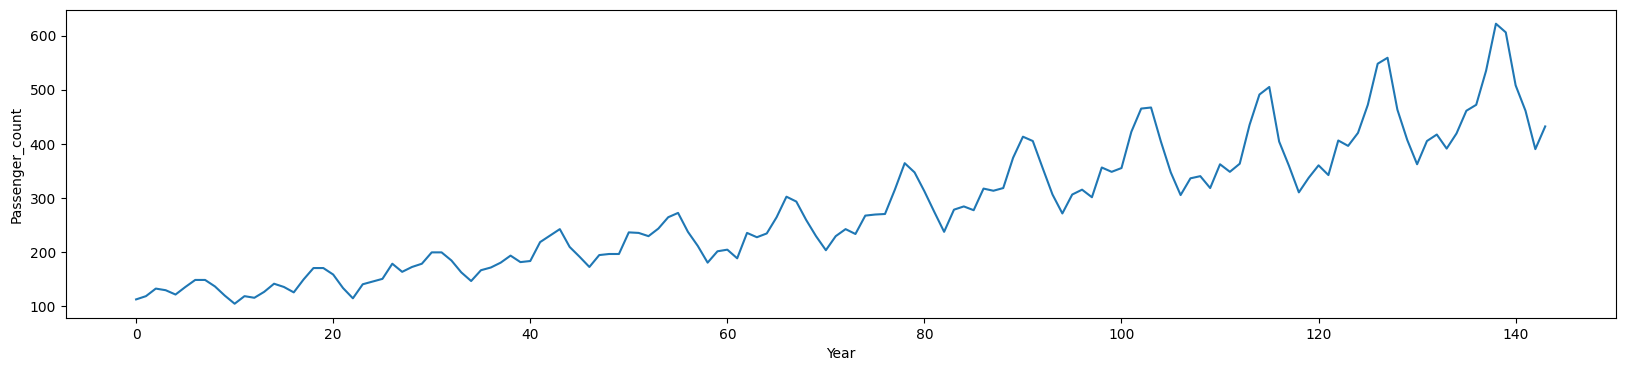

In [ ]:
print(f"Null values: {df.isnull().sum().sum()}")
plt.figure(figsize=(20,4))
ax=plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("Passenger_count")
plt.plot(df1.index,df1.Passengers)

 2. Check the stationary using ADF test
and autocorrelation plot.

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_results=adfuller(df1.Passengers)
print(test_results)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [ ]:
#Ho: Non stationary
#H1: Stationary

def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adfuller_test(df1.Passengers)
print(" data is not stationary (test statistic is greater than critical value). Needs some transformations.")

ADF Test Statistic : 0.8153688792060498
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
 data is not stationary (test statistic is greater than critical value). Needs some transformations.


In [ ]:
# First_Diffrence
df1["first_diff"]=df1.Passengers-df1.Passengers.shift(1)
print(df1.head())
print(adfuller_test(df1["first_diff"].dropna()))
df1["second_diff"]=df1.Passengers-df1.Passengers.shift(2)
print(df1.head())
print(adfuller_test(df1["second_diff"].dropna()))

       Month  Passengers  Year  first_diff
0 1949-01-01         112  1949         NaN
1 1949-02-01         118  1949         6.0
2 1949-03-01         132  1949        14.0
3 1949-04-01         129  1949        -3.0
4 1949-05-01         121  1949        -8.0
ADF Test Statistic : -2.8292668241700047
p-value : 0.05421329028382478
#Lags Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
       Month  Passengers  Year  first_diff  second_diff
0 1949-01-01         112  1949         NaN          NaN
1 1949-02-01         118  1949         6.0          NaN
2 1949-03-01         132  1949        14.0         20.0
3 1949-04-01         129  1949        -3.0         11.0
4 1949-05-01         121  1949        -8.0        -11.0
ADF Test Statistic : -2.961695135555418
p-value : 0.03862975767698902
#Lags Used : 11
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the

<Axes: >

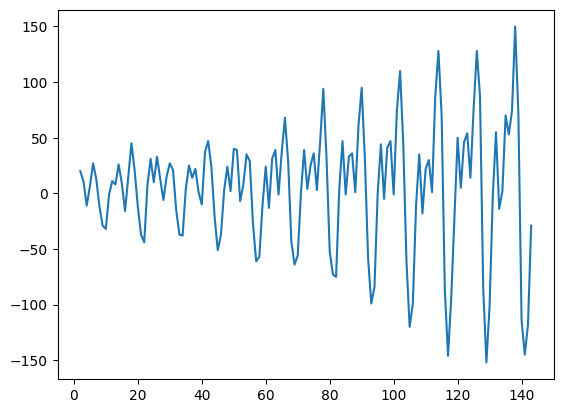

In [ ]:
# Second differencing
df1.second_diff.plot()

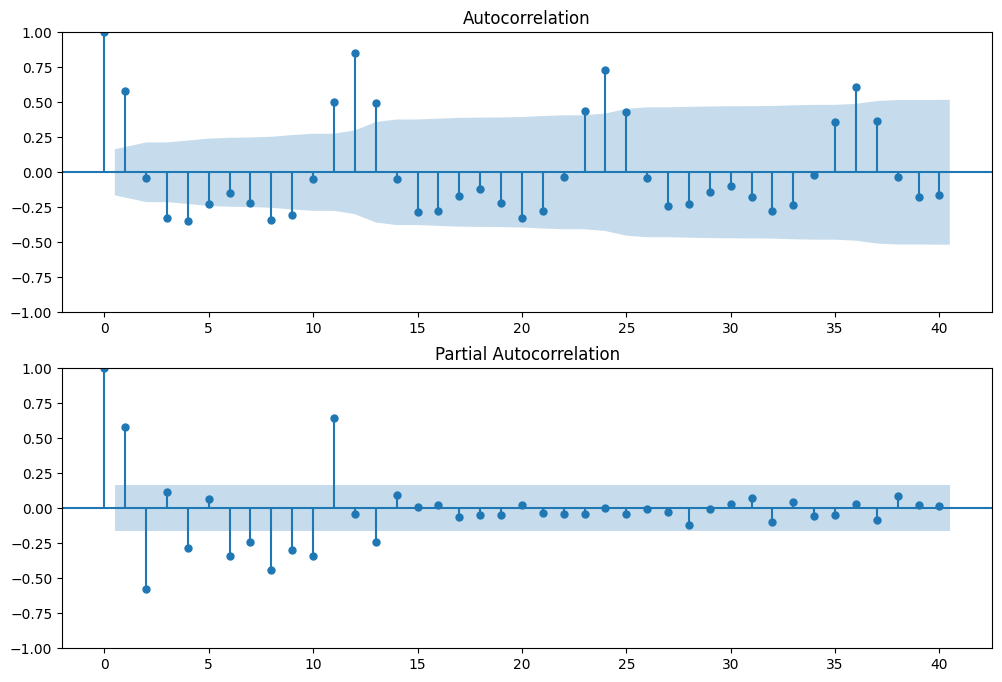

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1["second_diff"][2:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1["second_diff"][2:], lags=40, ax=ax2)

In [ ]:
df1.Passengers=df1.Passengers.astype(float)

3. Forecast the target variable prediction using a suitable
type of model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df1.Passengers,order=(1,0,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -711.090
Date:                Mon, 02 Dec 2024   AIC                           1428.181
Time:                        17:31:41   BIC                           1437.090
Sample:                             0   HQIC                          1431.801
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2943     66.403      4.221      0.000     150.146     410.442
ar.L1          0.9645      0.019     51.535      0.000       0.928       1.001
sigma2      1118.5409    122.133      9.158      0.000     879.164    1357.918
===================================================================================
Ljung-Box (L1) (Q):                  13.91   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.00   Prob(JB):                         0.67
Heteroskedasticity (H):               7.92   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  368.609833
140 1960-09-01       508.0  1960       -98.0       -114.0  365.478920
141 1960-10-01       461.0  1960       -47.0       -145.0  362.459003
142 1960-11-01       390.0  1960       -71.0       -118.0  359.546145
143 1960-12-01       432.0  1960        42.0        -29.0  356.736553

[144 rows x 6 columns]


,Month,Passengers,Year,first_diff,second_diff,forecast
0,1949-01-01,112.0,1949,NaN,NaN,NaN
1,1949-02-01,118.0,1949,6.0,NaN,NaN
2,1949-03-01,132.0,1949,14.0,20.0,NaN
3,1949-04-01,129.0,1949,-3.0,11.0,NaN
4,1949-05-01,121.0,1949,-8.0,-11.0,NaN
...,...,...,...,...,...,...
139,1960-08-01,606.0,1960,-16.0,71.0,368.609833
140,1960-09-01,508.0,1960,-98.0,-114.0,365.478920
141,1960-10-01,461.0,1960,-47.0,-145.0,362.459003
142,1960-11-01,390.0,1960,-71.0,-118.0,359.546145


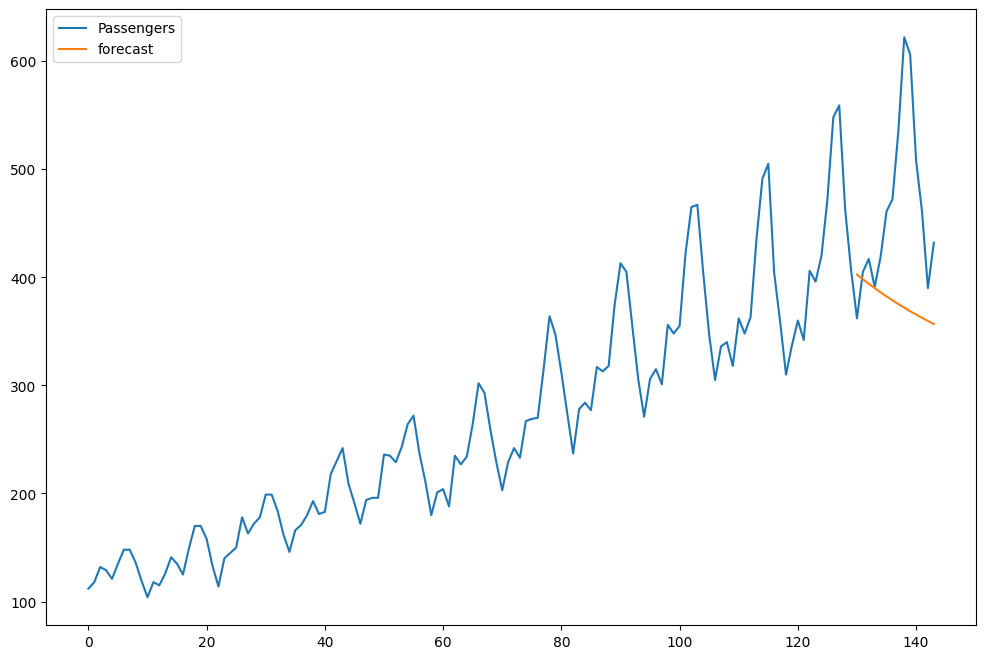

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df1.Passengers,order=(1,0,0))
model_fit=model.fit()
model_fit.summary()
df1['forecast']=model_fit.predict(start=130,end=143,dynamic=True)
print(df1)
df1[['Passengers','forecast']].plot(figsize=(12,8))
df1

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  382.244482
140 1960-09-01       508.0  1960       -98.0       -114.0  382.244356
141 1960-10-01       461.0  1960       -47.0       -145.0  382.244317
142 1960-11-01       390.0  1960       -71.0       -118.0  382.244306
143 1960-12-01       432.0  1960        42.0        -29.0  382.244302

[144 rows x 6 columns]


,Month,Passengers,Year,first_diff,second_diff,forecast
0,1949-01-01,112.0,1949,NaN,NaN,NaN
1,1949-02-01,118.0,1949,6.0,NaN,NaN
2,1949-03-01,132.0,1949,14.0,20.0,NaN
3,1949-04-01,129.0,1949,-3.0,11.0,NaN
4,1949-05-01,121.0,1949,-8.0,-11.0,NaN
...,...,...,...,...,...,...
139,1960-08-01,606.0,1960,-16.0,71.0,382.244482
140,1960-09-01,508.0,1960,-98.0,-114.0,382.244356
141,1960-10-01,461.0,1960,-47.0,-145.0,382.244317
142,1960-11-01,390.0,1960,-71.0,-118.0,382.244306


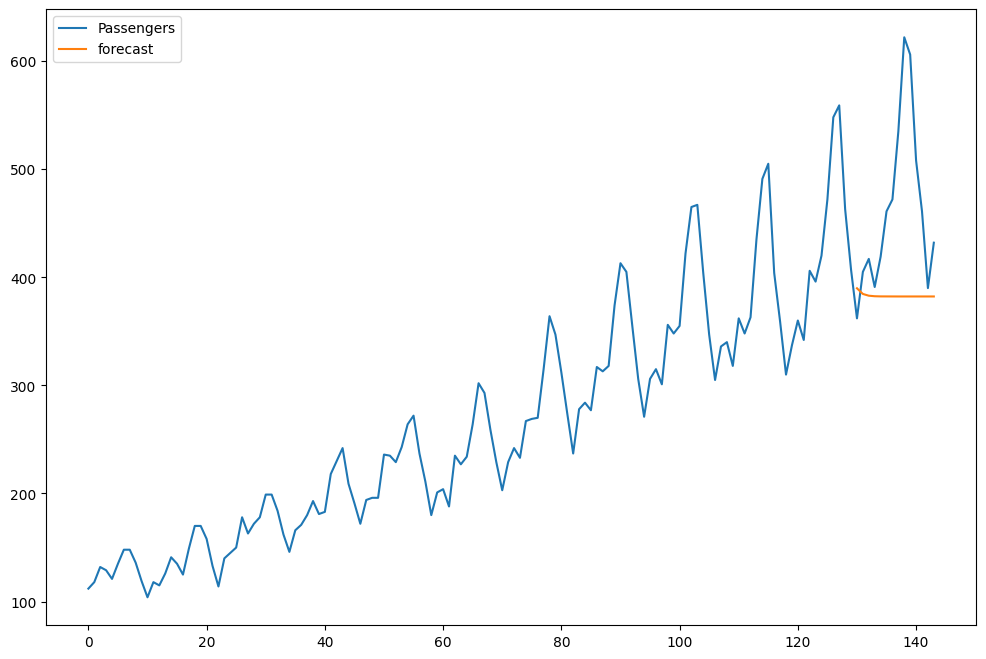

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df1.Passengers,order=(1,1,0))
model_fit=model.fit()
model_fit.summary()
df1['forecast']=model_fit.predict(start=130,end=143,dynamic=True)
print(df1)
df1[['Passengers','forecast']].plot(figsize=(12,8))
df1

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  403.436453
140 1960-09-01       508.0  1960       -98.0       -114.0  403.433431
141 1960-10-01       461.0  1960       -47.0       -145.0  403.434864
142 1960-11-01       390.0  1960       -71.0       -118.0  403.434184
143 1960-12-01       432.0  1960        42.0        -29.0  403.434507

[144 rows x 6 columns]


,Month,Passengers,Year,first_diff,second_diff,forecast
0,1949-01-01,112.0,1949,NaN,NaN,NaN
1,1949-02-01,118.0,1949,6.0,NaN,NaN
2,1949-03-01,132.0,1949,14.0,20.0,NaN
3,1949-04-01,129.0,1949,-3.0,11.0,NaN
4,1949-05-01,121.0,1949,-8.0,-11.0,NaN
...,...,...,...,...,...,...
139,1960-08-01,606.0,1960,-16.0,71.0,403.436453
140,1960-09-01,508.0,1960,-98.0,-114.0,403.433431
141,1960-10-01,461.0,1960,-47.0,-145.0,403.434864
142,1960-11-01,390.0,1960,-71.0,-118.0,403.434184


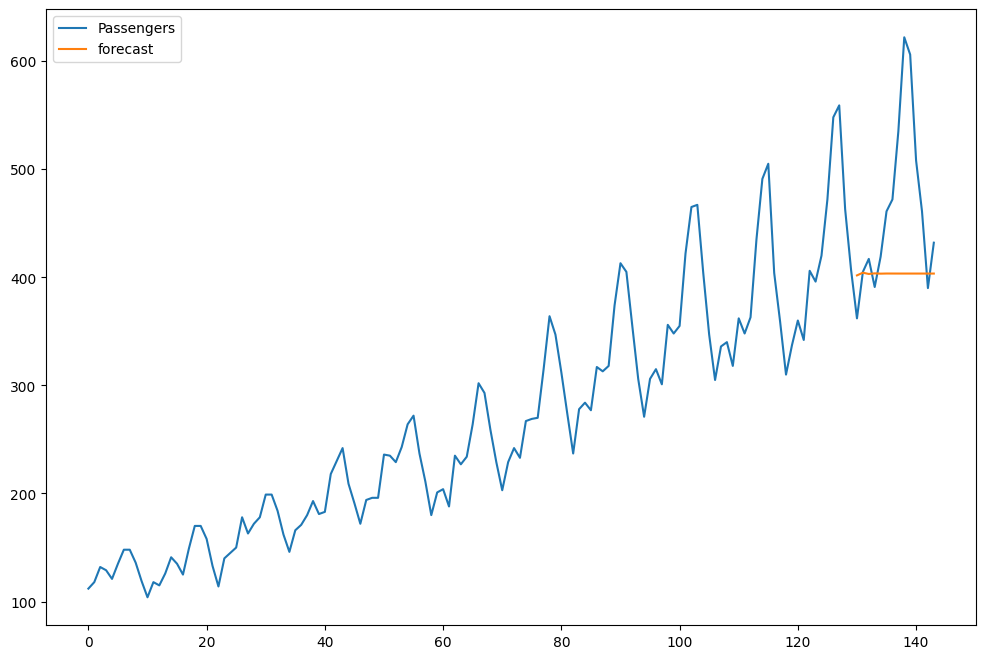

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df1.Passengers,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()
df1['forecast']=model_fit.predict(start=130,end=143,dynamic=True)
print(df1)
df1[['Passengers','forecast']].plot(figsize=(12,8))
df1

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  403.436453
140 1960-09-01       508.0  1960       -98.0       -114.0  403.433431
141 1960-10-01       461.0  1960       -47.0       -145.0  403.434864
142 1960-11-01       390.0  1960       -71.0       -118.0  403.434184
143 1960-12-01       432.0  1960        42.0        -29.0  403.434507

[144 rows x 6 columns]


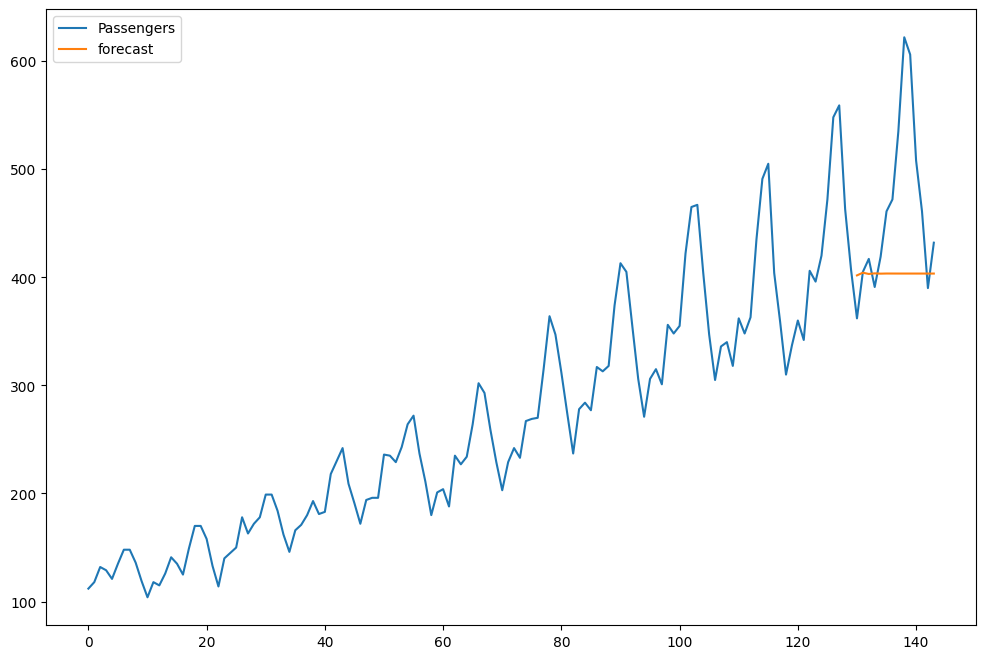

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1.Passengers,order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()
df1['forecast']=model_fit.predict(start=130,end=143,dynamic=True)
df1[['Passengers','forecast']].plot(figsize=(12,8))
print(df1)

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  477.654669
140 1960-09-01       508.0  1960       -98.0       -114.0  439.163432
141 1960-10-01       461.0  1960       -47.0       -145.0  440.044103
142 1960-11-01       390.0  1960       -71.0       -118.0  445.636373
143 1960-12-01       432.0  1960        42.0        -29.0  437.475637

[144 rows x 6 columns]


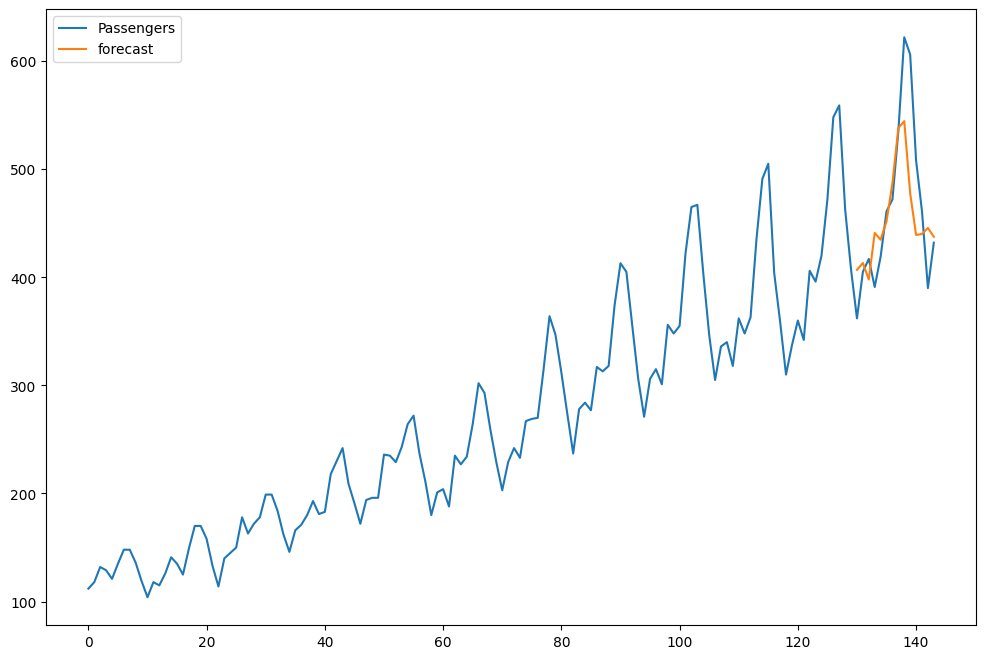

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1.Passengers,order=(1,1,1),seasonal_order=(1,1,1,11))
results=model.fit()
print(results)
df1['forecast']=results.predict(start=130,end=143,dynamic=True)
df1[['Passengers','forecast']].plot(figsize=(12,8))
print(df1)

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  542.454671
140 1960-09-01       508.0  1960       -98.0       -114.0  487.475196
141 1960-10-01       461.0  1960       -47.0       -145.0  512.911036
142 1960-11-01       390.0  1960       -71.0       -118.0  530.200944
143 1960-12-01       432.0  1960        42.0        -29.0  519.930743

[144 rows x 6 columns]


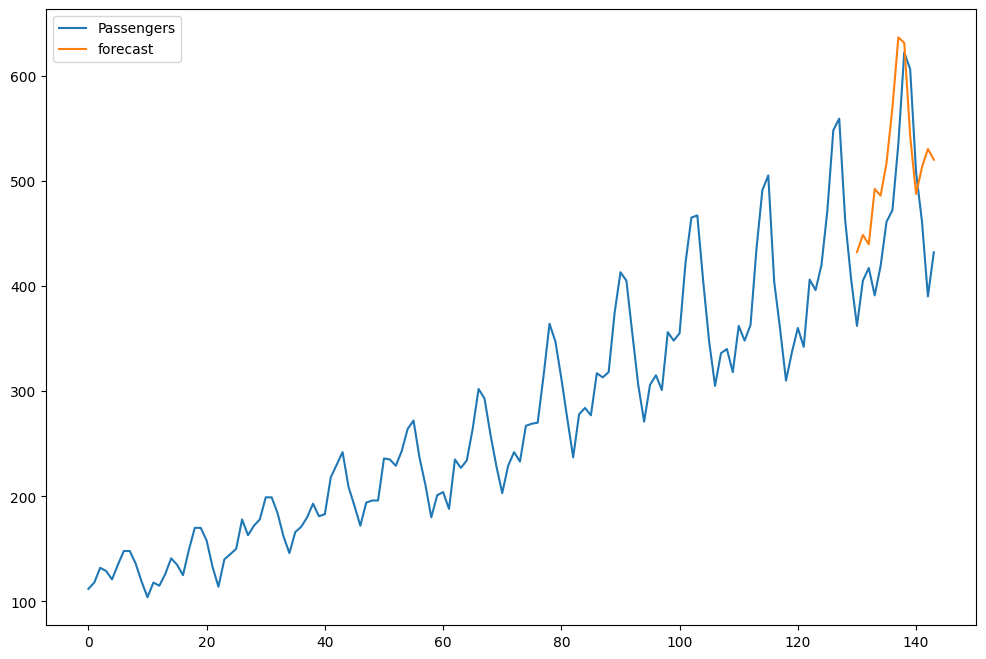

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1.Passengers,order=(1,1,0),seasonal_order=(1,1,0,11))
results=model.fit()
print(results)
df1['forecast']=results.predict(start=130,end=143,dynamic=True)
df1[['Passengers','forecast']].plot(figsize=(12,8))
print(df1)

         Month  Passengers  Year  first_diff  second_diff    forecast
0   1949-01-01       112.0  1949         NaN          NaN         NaN
1   1949-02-01       118.0  1949         6.0          NaN         NaN
2   1949-03-01       132.0  1949        14.0         20.0         NaN
3   1949-04-01       129.0  1949        -3.0         11.0         NaN
4   1949-05-01       121.0  1949        -8.0        -11.0         NaN
..         ...         ...   ...         ...          ...         ...
139 1960-08-01       606.0  1960       -16.0         71.0  603.299427
140 1960-09-01       508.0  1960       -98.0       -114.0  503.689768
141 1960-10-01       461.0  1960       -47.0       -145.0  449.827918
142 1960-11-01       390.0  1960       -71.0       -118.0  403.640874
143 1960-12-01       432.0  1960        42.0        -29.0  430.301666

[144 rows x 6 columns]


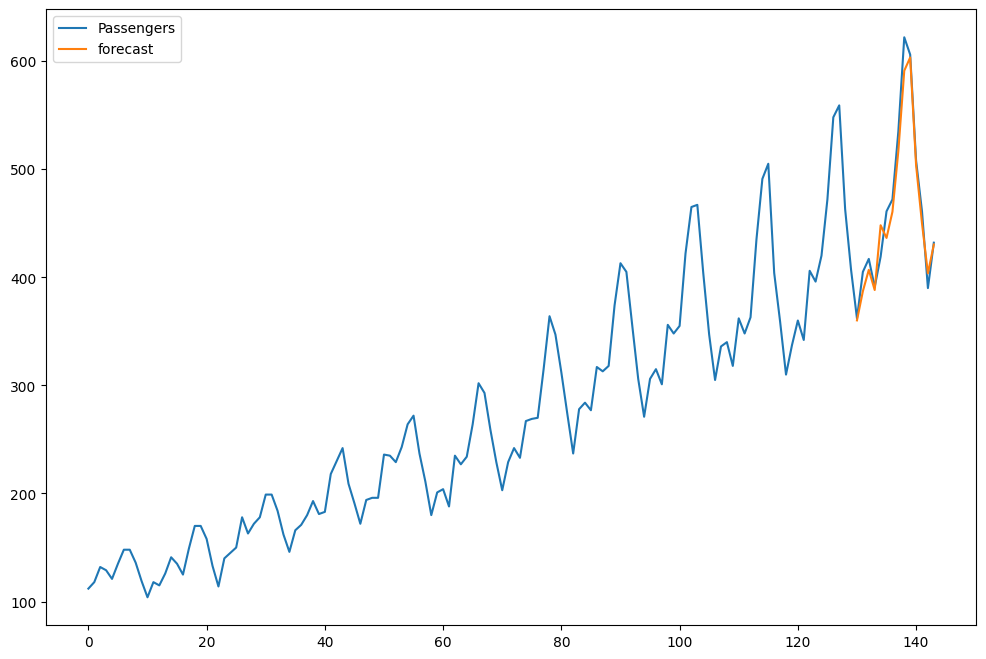

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1.Passengers,order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()
print(results)
df1['forecast']=results.predict(start=130,end=143,dynamic=True)
df1[['Passengers','forecast']].plot(figsize=(12,8))
print(df1)

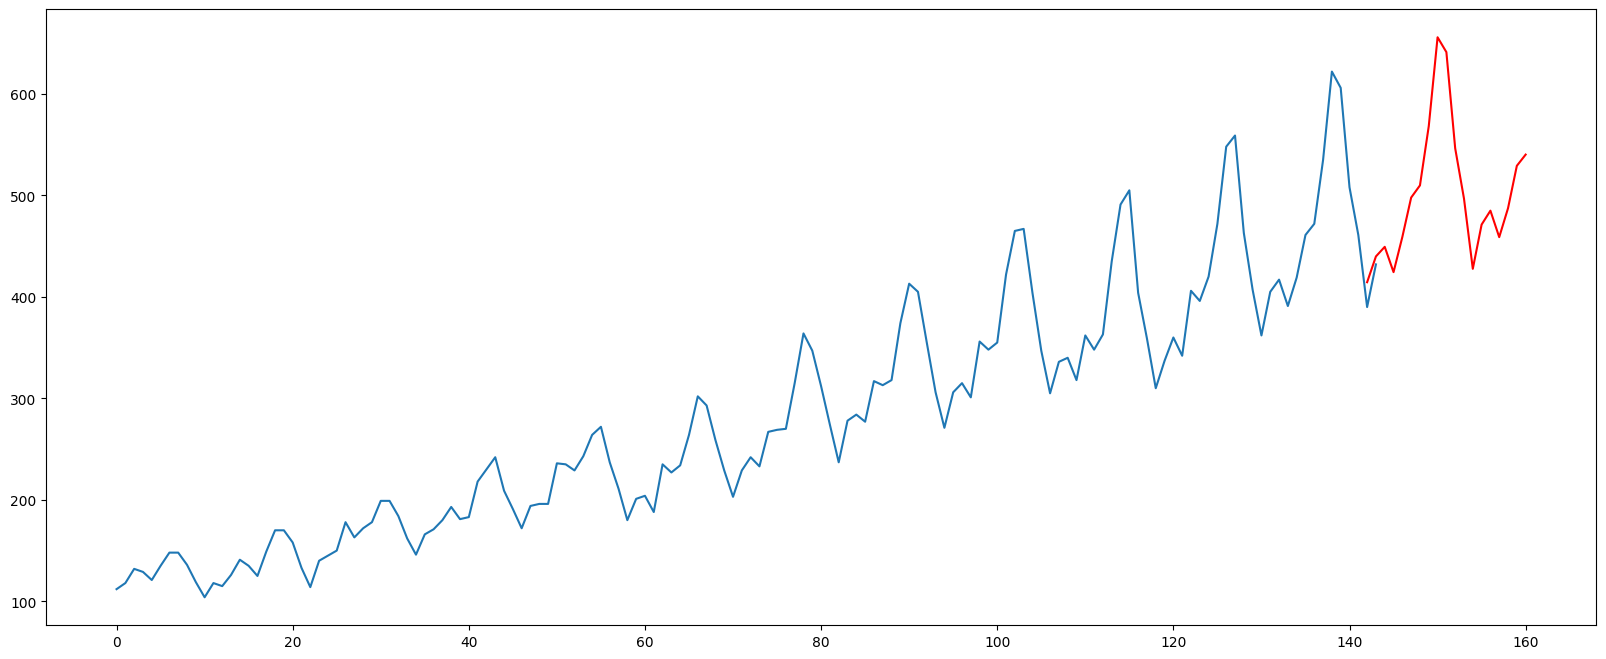

In [ ]:
fig = plt.figure(figsize=(20,8))
num_points = len(df1.Passengers)
x = results.predict(start=(142), end=(160), dynamic=False)
plt.plot(df1["Passengers"][:144])
plt.plot(x, color='r')

In [ ]:
# df.set_index('Month',inplace=True)
# df.index=pd.to_datetime(df1.index)
print(df)
df2=df1.copy()
df2.set_index('Month',inplace=True)
print(df2)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]
            Passengers  Year  first_diff  second_diff    forecast
Month                                                            
1949-01-01       112.0  1949         NaN          NaN         NaN
1949-02-01       118.0  1949         6.0          NaN         NaN
1949-03-01       132.0  1949        14.0         20.0         NaN
1949-04-01       129.0  1949        -3.0         11.0         NaN
1949-05-01       121.0  1949        -8.0        -11.0         NaN
...                ...   ...         ...          ...         ...
1960-08-01       606.0  1960       -16.0         71.0  603.299427
1960-09-01       508.0  1960       -98.0       -114.0  503.689768
1960-10-01      

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df2.index[-1]+ DateOffset(months=x)for x in range(0,60)]
# future_dates
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df2.columns)
len(future_datest_df.index)
future_df=pd.concat([df2,future_datest_df])
print(future_df)

            Passengers  Year  first_diff  second_diff  forecast
1949-01-01       112.0  1949         NaN          NaN       NaN
1949-02-01       118.0  1949         6.0          NaN       NaN
1949-03-01       132.0  1949        14.0         20.0       NaN
1949-04-01       129.0  1949        -3.0         11.0       NaN
1949-05-01       121.0  1949        -8.0        -11.0       NaN
...                ...   ...         ...          ...       ...
1965-07-01         NaN   NaN         NaN          NaN       NaN
1965-08-01         NaN   NaN         NaN          NaN       NaN
1965-09-01         NaN   NaN         NaN          NaN       NaN
1965-10-01         NaN   NaN         NaN          NaN       NaN
1965-11-01         NaN   NaN         NaN          NaN       NaN

[203 rows x 5 columns]


<ipython-input-22-21adb1e8ccc5>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df2,future_datest_df])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Passengers  Year  first_diff  second_diff    forecast
1949-01-01       112.0  1949         NaN          NaN         NaN
1949-02-01       118.0  1949         6.0          NaN         NaN
1949-03-01       132.0  1949        14.0         20.0         NaN
1949-04-01       129.0  1949        -3.0         11.0         NaN
1949-05-01       121.0  1949        -8.0        -11.0         NaN
...                ...   ...         ...          ...         ...
1965-07-01         NaN   NaN         NaN          NaN  818.069244
1965-08-01         NaN   NaN         NaN          NaN  803.277320
1965-09-01         NaN   NaN         NaN          NaN  708.078701
1965-10-01         NaN   NaN         NaN          NaN  658.811043
1965-11-01         NaN   NaN         NaN          NaN  589.450827

[203 rows x 5 columns]


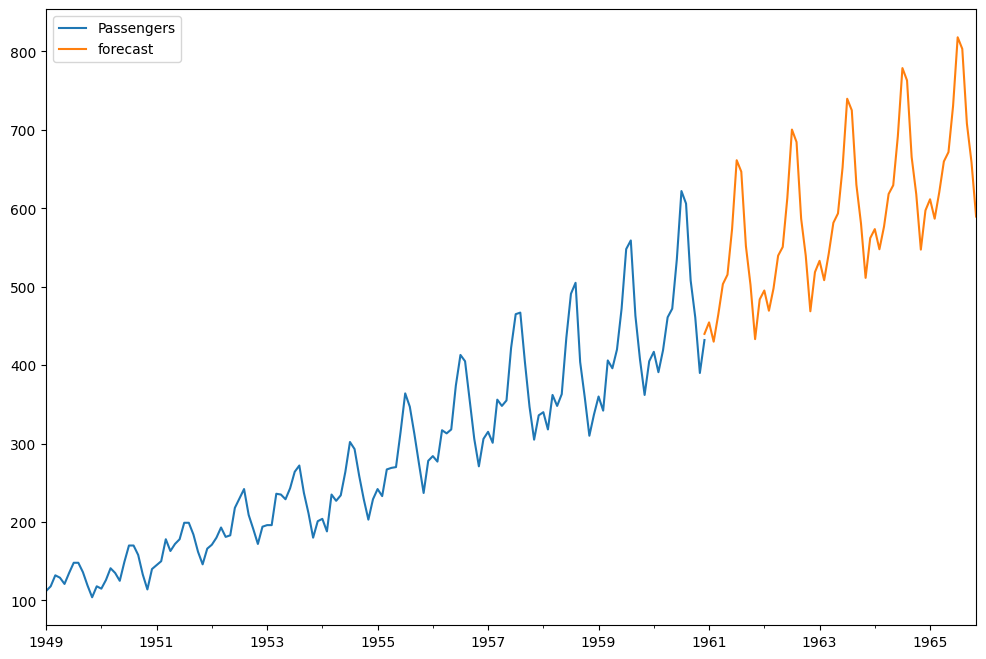

In [ ]:
model=sm.tsa.statespace.SARIMAX(future_df.Passengers,order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()
print(results)
future_df['forecast']=results.predict(start=143,end=203,dynamic=True)
future_df[['Passengers','forecast']].plot(figsize=(12,8))
print(future_df)